# Run the following block ...
... for changes to the library to carry through the notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib.variational_autoencoder import variational_autoencoder as vae
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import pandas as pd
import torch as T

2023-02-25 17:11:39.288727: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-02-25 17:11:39.313391: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-02-25 17:11:39.314217: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 17:11:39.965607: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data preparation

In [3]:
df_1 = pd.read_csv('data/USCensus1990_1.csv')
df_2 = pd.read_csv('data/USCensus1990_2.csv')

# Temporarily create a smaller data set to work on for testing purposes
df_1_first_64 = df_1.head(64)
df_1_first_64 = df_1_first_64.drop('caseid', axis=1)

In [4]:
scaler = MinMaxScaler()
scaler.fit(df_1_first_64)

normalized_64 = scaler.transform(df_1_first_64)
normalized_64 = pd.DataFrame(normalized_64,columns=df_1_first_64.columns)

## Creating and training the model

In [5]:
data_64 = tf.convert_to_tensor(normalized_64)
input_size, batch_size, hidden_size = 10, len(df_1_first_64), 128

model = vae(data_64,input_size,batch_size,hidden_size).get()
model.compile(loss="mean_squared_error",optimizer="adam")

history = model.fit(
    data_64, data_64, shuffle=True, epochs=1000, batch_size=batch_size, validation_split=0.2
).history

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 2.5810 - val_loss: 1.3017
Epoch 2/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.4090 - val_loss: 1.2930
Epoch 3/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.2612 - val_loss: 1.2846
Epoch 4/1000
1/1 [==============================] - 0s 23ms/step - loss: 2.1310 - val_loss: 1.2766
Epoch 5/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0163 - val_loss: 1.2684
Epoch 6/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9162 - val_loss: 1.2602
Epoch 7/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.8287 - val_loss: 1.2519
Epoch 8/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.7517 - val_loss: 1.2436
Epoch 9/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.6827 - val_loss: 1.2352
Epoch 10/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.6207 - val_loss: 1.2267
Epoch 11/10

1/1 [==============================] - 0s 19ms/step - loss: 0.5228 - val_loss: 0.5647
Epoch 84/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.5156 - val_loss: 0.5577
Epoch 85/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5084 - val_loss: 0.5508
Epoch 86/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.5013 - val_loss: 0.5440
Epoch 87/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4943 - val_loss: 0.5372
Epoch 88/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.4874 - val_loss: 0.5306
Epoch 89/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4806 - val_loss: 0.5240
Epoch 90/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4740 - val_loss: 0.5176
Epoch 91/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.4674 - val_loss: 0.5113
Epoch 92/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4609 - val_loss: 0.5050
Epoch 93/1000


1/1 [==============================] - 0s 27ms/step - loss: 0.1793 - val_loss: 0.2393
Epoch 165/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1771 - val_loss: 0.2373
Epoch 166/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1749 - val_loss: 0.2352
Epoch 167/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1727 - val_loss: 0.2332
Epoch 168/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1706 - val_loss: 0.2312
Epoch 169/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1685 - val_loss: 0.2293
Epoch 170/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.1664 - val_loss: 0.2274
Epoch 171/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1645 - val_loss: 0.2255
Epoch 172/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1626 - val_loss: 0.2236
Epoch 173/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1606 - val_loss: 0.2218
Epoch

1/1 [==============================] - 0s 25ms/step - loss: 0.0714 - val_loss: 0.1399
Epoch 246/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0709 - val_loss: 0.1393
Epoch 247/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0699 - val_loss: 0.1386
Epoch 248/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0693 - val_loss: 0.1379
Epoch 249/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0685 - val_loss: 0.1372
Epoch 250/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0678 - val_loss: 0.1367
Epoch 251/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0671 - val_loss: 0.1361
Epoch 252/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0663 - val_loss: 0.1354
Epoch 253/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0656 - val_loss: 0.1348
Epoch 254/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0649 - val_loss: 0.1343
Epoch

1/1 [==============================] - 0s 23ms/step - loss: 0.0336 - val_loss: 0.1077
Epoch 327/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0331 - val_loss: 0.1075
Epoch 328/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0327 - val_loss: 0.1073
Epoch 329/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0326 - val_loss: 0.1069
Epoch 330/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0322 - val_loss: 0.1068
Epoch 331/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0319 - val_loss: 0.1065
Epoch 332/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0315 - val_loss: 0.1063
Epoch 333/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0312 - val_loss: 0.1061
Epoch 334/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0310 - val_loss: 0.1057
Epoch 335/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0307 - val_loss: 0.1055
Epoch

1/1 [==============================] - 0s 19ms/step - loss: 0.0178 - val_loss: 0.0939
Epoch 408/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0179 - val_loss: 0.0936
Epoch 409/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0180 - val_loss: 0.0933
Epoch 410/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0173 - val_loss: 0.0932
Epoch 411/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0175 - val_loss: 0.0930
Epoch 412/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0172 - val_loss: 0.0927
Epoch 413/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0170 - val_loss: 0.0927
Epoch 414/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0170 - val_loss: 0.0925
Epoch 415/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0167 - val_loss: 0.0923
Epoch 416/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0166 - val_loss: 0.0922
Epoch

1/1 [==============================] - 0s 20ms/step - loss: 0.0103 - val_loss: 0.0848
Epoch 489/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0102 - val_loss: 0.0848
Epoch 490/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0101 - val_loss: 0.0850
Epoch 491/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0101 - val_loss: 0.0849
Epoch 492/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0100 - val_loss: 0.0849
Epoch 493/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0100 - val_loss: 0.0850
Epoch 494/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0099 - val_loss: 0.0851
Epoch 495/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0098 - val_loss: 0.0851
Epoch 496/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0098 - val_loss: 0.0854
Epoch 497/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0097 - val_loss: 0.0854
Epoch

1/1 [==============================] - 0s 16ms/step - loss: 0.0073 - val_loss: 0.0789
Epoch 570/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0072 - val_loss: 0.0779
Epoch 571/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0072 - val_loss: 0.0778
Epoch 572/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0072 - val_loss: 0.0785
Epoch 573/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0072 - val_loss: 0.0773
Epoch 574/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0069 - val_loss: 0.0777
Epoch 575/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0069 - val_loss: 0.0770
Epoch 576/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0070 - val_loss: 0.0768
Epoch 577/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0068 - val_loss: 0.0769
Epoch 578/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0067 - val_loss: 0.0764
Epoch

1/1 [==============================] - 0s 18ms/step - loss: 0.0063 - val_loss: 0.0630
Epoch 651/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0057 - val_loss: 0.0624
Epoch 652/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0063 - val_loss: 0.0620
Epoch 653/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0060 - val_loss: 0.0603
Epoch 654/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0061 - val_loss: 0.0596
Epoch 655/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0057 - val_loss: 0.0598
Epoch 656/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0056 - val_loss: 0.0586
Epoch 657/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0057 - val_loss: 0.0577
Epoch 658/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0055 - val_loss: 0.0575
Epoch 659/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0055 - val_loss: 0.0572
Epoch

1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - val_loss: 0.0480
Epoch 732/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0048 - val_loss: 0.0481
Epoch 733/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0046 - val_loss: 0.0475
Epoch 734/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0047 - val_loss: 0.0464
Epoch 735/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - val_loss: 0.0465
Epoch 736/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0045 - val_loss: 0.0469
Epoch 737/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - val_loss: 0.0457
Epoch 738/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0045 - val_loss: 0.0453
Epoch 739/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - val_loss: 0.0463
Epoch 740/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0044 - val_loss: 0.0454
Epoch

1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - val_loss: 0.0422
Epoch 813/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0046 - val_loss: 0.0407
Epoch 814/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0040 - val_loss: 0.0413
Epoch 815/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - val_loss: 0.0408
Epoch 816/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0045 - val_loss: 0.0401
Epoch 817/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0043 - val_loss: 0.0392
Epoch 818/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0041 - val_loss: 0.0389
Epoch 819/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - val_loss: 0.0385
Epoch 820/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0043 - val_loss: 0.0375
Epoch 821/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0039 - val_loss: 0.0379
Epoch

1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - val_loss: 0.0344
Epoch 894/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0033 - val_loss: 0.0353
Epoch 895/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0032 - val_loss: 0.0350
Epoch 896/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0032 - val_loss: 0.0352
Epoch 897/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0360
Epoch 898/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0032 - val_loss: 0.0353
Epoch 899/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0032 - val_loss: 0.0359
Epoch 900/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0032 - val_loss: 0.0358
Epoch 901/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0032 - val_loss: 0.0360
Epoch 902/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0033 - val_loss: 0.0360
Epoch

1/1 [==============================] - 0s 16ms/step - loss: 0.0030 - val_loss: 0.0324
Epoch 975/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 0.0329
Epoch 976/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0029 - val_loss: 0.0328
Epoch 977/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0029 - val_loss: 0.0330
Epoch 978/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - val_loss: 0.0330
Epoch 979/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0029 - val_loss: 0.0329
Epoch 980/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - val_loss: 0.0331
Epoch 981/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0029 - val_loss: 0.0329
Epoch 982/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0028 - val_loss: 0.0331
Epoch 983/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - val_loss: 0.0332
Epoch

## Loss analysis

<AxesSubplot:xlabel='epoch'>

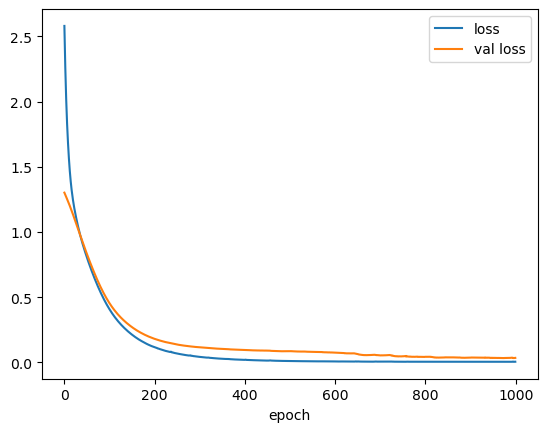

In [6]:
plot_df = pd.DataFrame({
    'epoch' : [i for i in range(1000)],
    'loss' : history['loss'],
    'val loss' : history['val_loss']
})
plot_df.plot(kind='line', x='epoch')

## Prediction Evaluation

In [7]:
eval_prediction = list(model.predict(df_1_first_64)[0,:])
eval_real_data  = list(df_1_first_64.iloc[0, :])

2/2 [==============================] - 0s 3ms/step


<AxesSubplot:xlabel='attribute'>

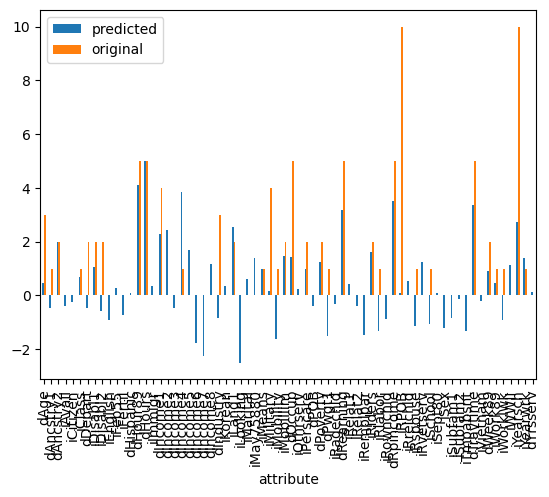

In [8]:
plot_df = pd.DataFrame({
    'attribute' : df_1_first_64.columns ,
    'predicted' : eval_prediction       ,
    'original'  : eval_real_data        ,
})
plot_df.plot(kind='bar', x='attribute')